<a href="https://colab.research.google.com/github/amritatiwari789/fish_img_classification/blob/main/Copy_of_fish_img_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import zipfile




Saving Dataset.zip to Dataset (1).zip


In [ ]:
# Unzip Dataset.zip into a folder called "fish_data"
with zipfile.ZipFile("Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("fish_data")

print("✅ Done! Unzipped into folder 'fish_data'")

✅ Done! Unzipped into folder 'fish_data'


In [ ]:
import os

# List inside fish_data
base_path = "fish_data"
for root, dirs, files in os.walk(base_path):
    print("📁", root)
    for d in dirs:
        print("   ┗ 📂", d)
    for f in files:
        print("   ┗ 📄", f)
        # Folders to clean
for split in ['train', 'val', 'test']:
    folder_path = os.path.join(base_dir, split, 'fish')
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f'Removed folder: {folder_path}')
    else:
        print(f'No "fish" folder found in {split}')
import os
import shutil

# Base directory
base_dir = 'fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data'

# Remove leftover "fish" folders if they exist
for split in ['train', 'val', 'test']:
    fish_folder = os.path.join(base_dir, split, 'fish')
    if os.path.exists(fish_folder):
        shutil.rmtree(fish_folder)
        print(f"❌ Removed: {fish_folder}")
    else:
        print(f"✅ No 'fish' folder in {split}")




📁 fish_data
   ┗ 📂 images.cv_jzk6llhf18tm3k0kyttxz
📁 fish_data/images.cv_jzk6llhf18tm3k0kyttxz
   ┗ 📂 data
   ┗ 📄 readme.txt
📁 fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data
   ┗ 📂 train
   ┗ 📂 val
   ┗ 📂 test
📁 fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train
   ┗ 📂 black_sea_sprat
   ┗ 📂 red_sea_bream
   ┗ 📂 striped_red_mullet
   ┗ 📂 red_mullet
   ┗ 📂 sea_bass
   ┗ 📂 fish
   ┗ 📂 gilt_head_bream
   ┗ 📂 hourse_mackerel
   ┗ 📂 bass
   ┗ 📂 shrimp
   ┗ 📂 trout
📁 fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train/black_sea_sprat
   ┗ 📄 WGVZI4L2LYY6.jpg
   ┗ 📄 5VFFEILC533G.jpg
   ┗ 📄 66QIEJ103IDP.jpg
   ┗ 📄 3MPMPIL4P1CS.jpg
   ┗ 📄 88GCDKUY03JW.jpg
   ┗ 📄 LZUECXS018XL.jpg
   ┗ 📄 ECAYIJXR62V3.jpg
   ┗ 📄 6T6M1AHT6AK8.jpg
   ┗ 📄 8DRDWM966PJ1.jpg
   ┗ 📄 O0R856EM9FM5.jpg
   ┗ 📄 5NAPLE0I8M0J.jpg
   ┗ 📄 8BYTRXTTLYTB.jpg
   ┗ 📄 QX2JN6GQODRQ.jpg
   ┗ 📄 JTUHQ9YK6U48.jpg
   ┗ 📄 F3PZ3WZF6TY1.jpg
   ┗ 📄 WOZWP3ORQIY0.jpg
   ┗ 📄 TDSXEIGXBRL8.jpg
   ┗ 📄 YPQTEK2D1PW0.jpg
   ┗ 📄 LMCGU5K22X1C.jpg
   ┗ 📄 

In [ ]:
# Rename folders to simple species names
for split in ['train', 'val', 'test']:
    path = os.path.join(base_dir, split)
    for folder_name in os.listdir(path):
        old_path = os.path.join(path, folder_name)
        if os.path.isdir(old_path):
            new_name = folder_name.split()[-1].lower().replace("-", "_")
            new_path = os.path.join(path, new_name)
            if old_path != new_path and not os.path.exists(new_path):
                os.rename(old_path, new_path)
                print(f"Renamed: '{folder_name}' ➜ '{new_name}'")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths
data_dir = 'fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data'
train_dir = f'{data_dir}/train'
val_dir = f'{data_dir}/val'
test_dir = f'{data_dir}/test'





# Image generators (rescaling pixels)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


import os

# Rename folders to clean class names
base_dir = 'fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data'

for split in ['train', 'val', 'test']:
    path = os.path.join(base_dir, split)

    for folder_name in os.listdir(path):
        old_path = os.path.join(path, folder_name)
        if os.path.isdir(old_path):
            # Rename folder to use only the last word (e.g., "fish sea_food trout" ➜ "trout")
            new_name = folder_name.split()[-1].lower().replace("-", "_")
            new_path = os.path.join(path, new_name)
            if old_path != new_path:
                os.rename(old_path, new_path)
                print(f'Renamed: "{folder_name}" ➜ "{new_name}"')

# Load images from folders
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5129 images belonging to 10 classes.
Found 905 images belonging to 10 classes.
Found 2667 images belonging to 10 classes.


Fish Categories: ['black_sea_sprat', 'red_sea_bream', 'striped_red_mullet', 'red_mullet', 'sea_bass', 'gilt_head_bream', 'hourse_mackerel', 'bass', 'shrimp', 'trout']


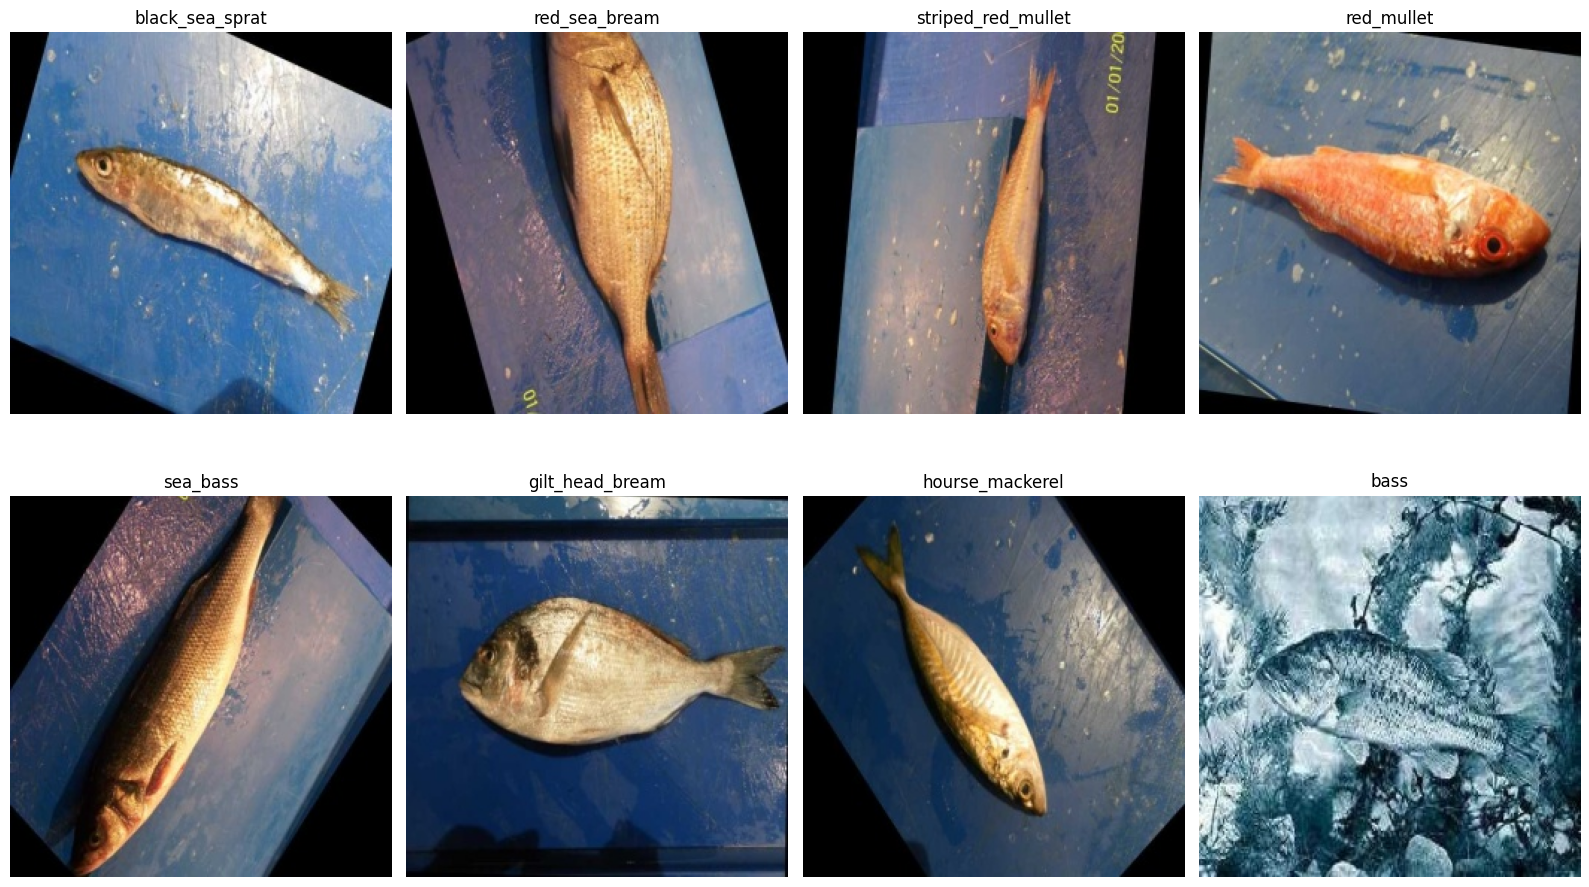

In [ ]:
'''import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ Correct path to your training data
train_path = "/content/fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Only include folders (classes)
categories = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
print("Fish Categories:", categories)

# Show one sample image per fish category
plt.figure(figsize=(16, 12))  # Increase size if needed

for i, category in enumerate(categories[:8]):  # Change 8 to a higher number if you want more
'''
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Update this to your actual training directory path
train_path = "/content/fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train"

# Get the list of class folders
categories = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
print("Fish Categories:", categories)

# Plot sample image from each category
plt.figure(figsize=(16, 10))

for i, category in enumerate(categories[:8]):  # Show up to 8 classes for now
    folder = os.path.join(train_path, category)
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not image_files:
        continue
    image_path = os.path.join(folder, image_files[0])

    img = mpimg.imread(image_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()
import os
import shutil

# Base directory where your data is stored
base_dir = 'fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data'





In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()

# Input block
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 4
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Fully connected
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_data.class_indices), activation='softmax'))  # Dynamic class count

# Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5)

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)



Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 32s 152ms/step - accuracy: 0.4197 - loss: 5.2032 - val_accuracy: 0.1901 - val_loss: 18.8608 - learning_rate: 5.0000e-04
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - accuracy: 0.7167 - loss: 0.8881 - val_accuracy: 0.1967 - val_loss: 19.7670 - learning_rate: 5.0000e-04
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8216 - loss: 0.5806 - val_accuracy: 0.5105 - val_loss: 6.5288 - learning_rate: 5.0000e-04
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8575 - loss: 0.5025 - val_accuracy: 0.7227 - val_loss: 1.2674 - learning_rate: 5.0000e-04
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8927 - loss: 0.3505 - val_accuracy: 0.6508 - val_loss: 2.3055 - learning_rate: 5.0000e-04
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9088 - loss: 0.3188 - val_accuracy: 0.8365 - val_loss: 1.0428 - learning_rate: 5.0000e-04
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9952 - loss: 0.3147
Test Accuracy: 0.9963
Test Loss: 0.0727


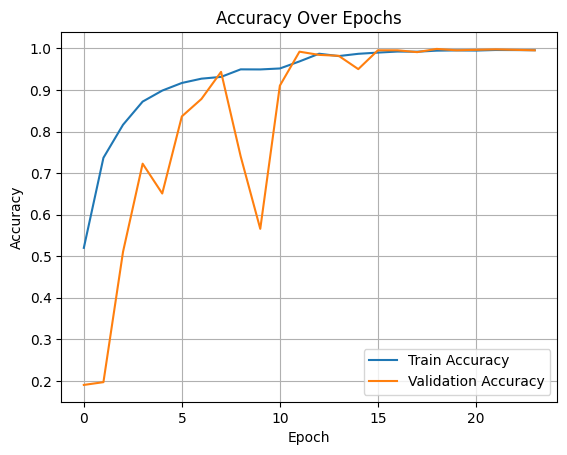

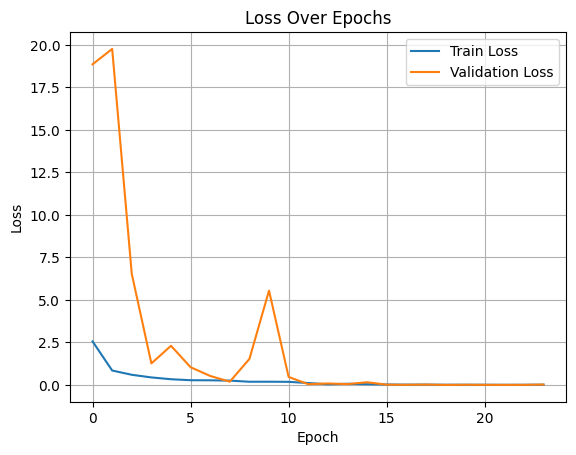

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


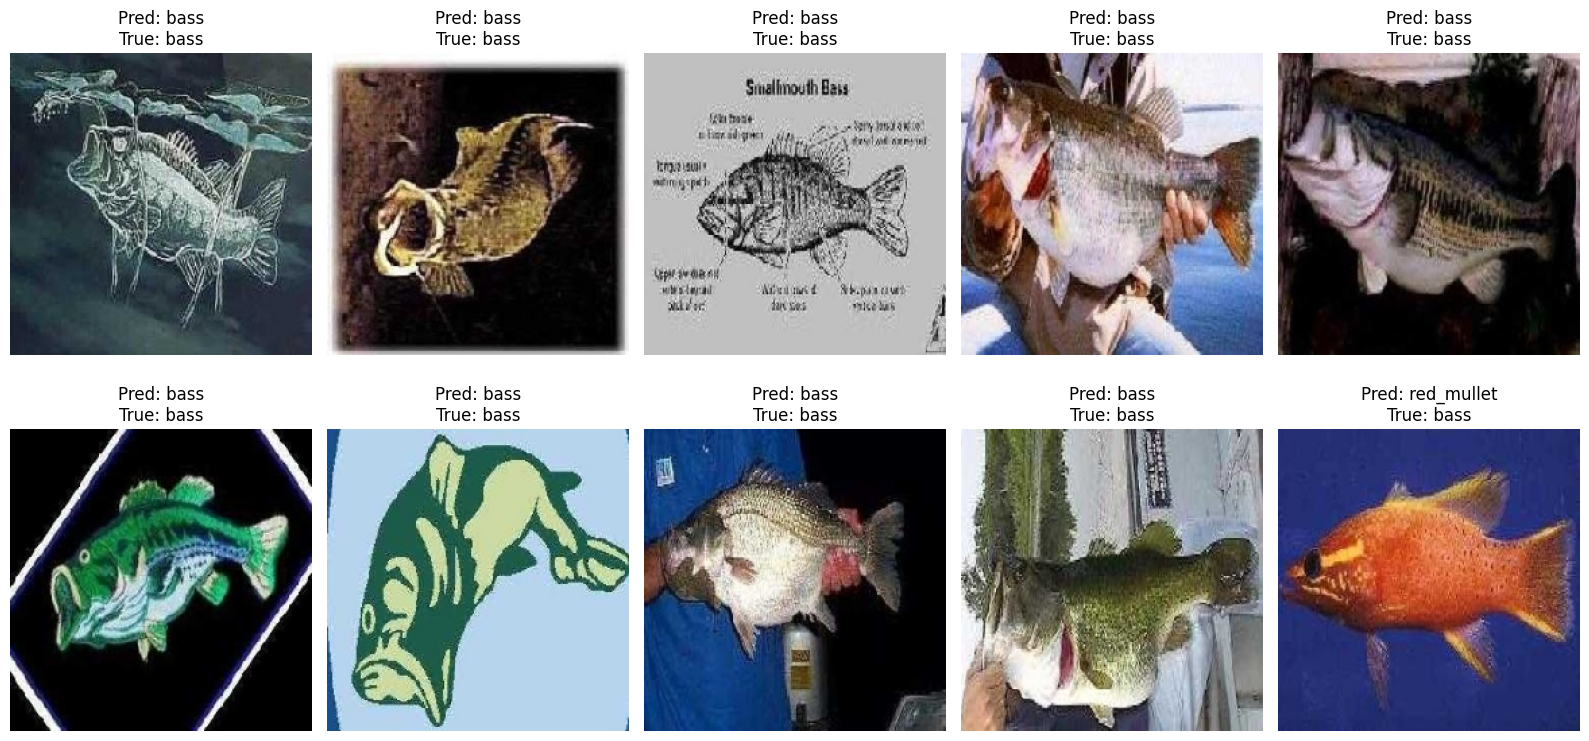

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_names = list(train_data.class_indices.keys())

# Get a batch of test images and predictions
test_images, test_labels = next(test_data)
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Plot first 10 test images with predicted and true labels
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


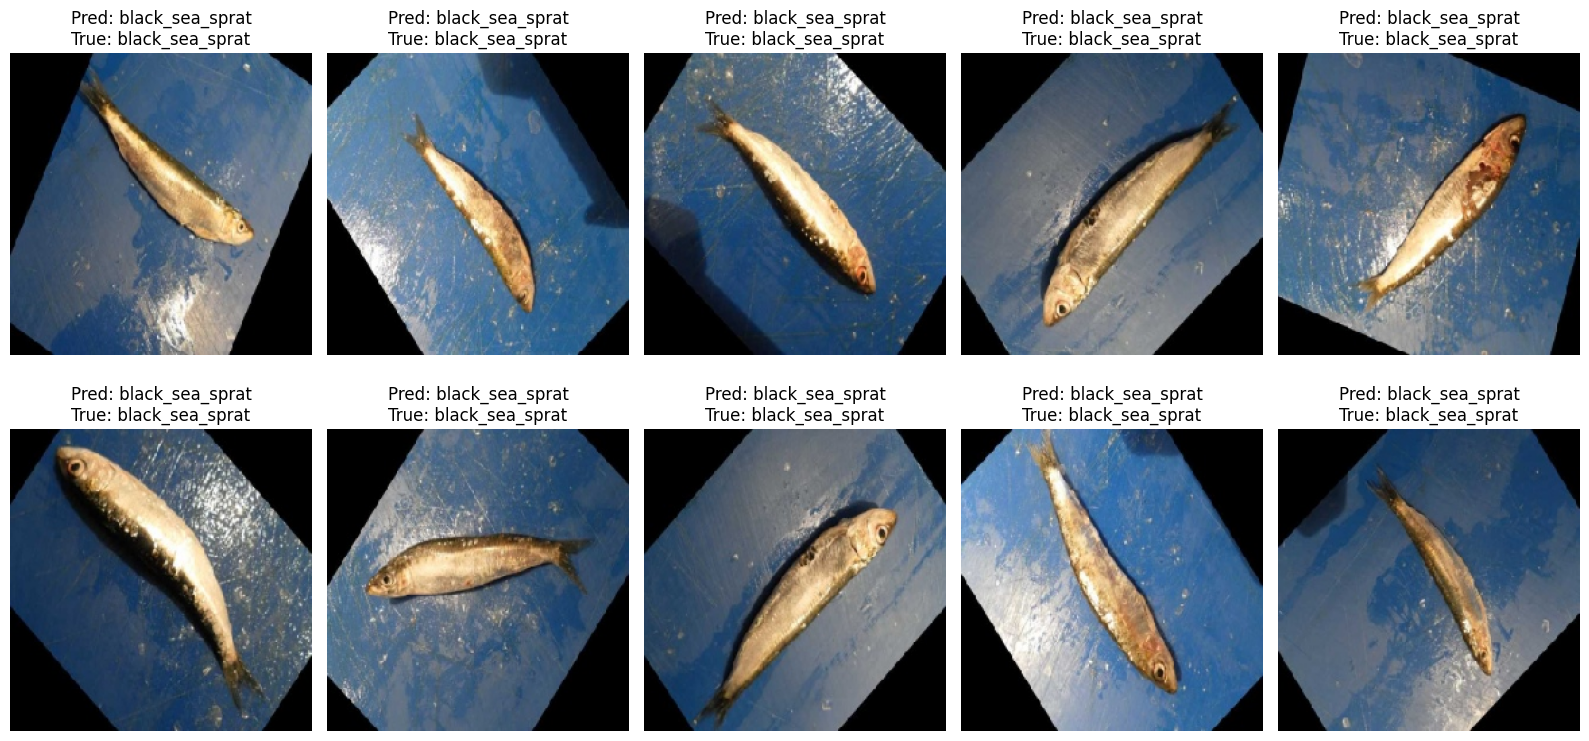

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_names = list(train_data.class_indices.keys())

# Get a batch of test images and predictions
test_images, test_labels = next(test_data)
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Plot first 10 test images with predicted and true labels
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Saving King-Salmon.jpg to King-Salmon.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ Predicted Class: bass
🔍 Confidence: 1.00


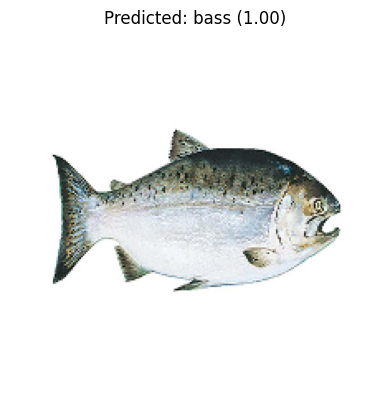

Your class labels are: ['bass', 'black_sea_sprat', 'gilt_head_bream', 'hourse_mackerel', 'red_mullet', 'red_sea_bream', 'sea_bass', 'shrimp', 'striped_red_mullet', 'trout']


In [ ]:
# Upload image
from google.colab import files
uploaded = files.upload()

# Preprocess and predict
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Get uploaded filename
img_filename = next(iter(uploaded))
img_path = f'/content/{img_filename}'

# Load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Get class labels from training generator
class_labels = list(train_data.class_indices.keys())

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)

# Output
print(f"✅ Predicted Class: {predicted_class}")
print(f"🔍 Confidence: {confidence:.2f}")

# Show image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
plt.axis('off')
plt.show()
print("Your class labels are:", class_labels)




In [ ]:
model.save("fish_classifier_model.h5")
print("💾 Model saved successfully!")




💾 Model saved successfully!


In [ ]:
import json

class_indices = {"catfish": 0, "goldfish": 1, "salmon": 2, "tuna": 3}

with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

